In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a simple metropolis algorithm is implemented to sample a rayleigh distribution with $\sigma=2$; the pdf of a rayleigh rv is:
$$
    f(x, \sigma) = \frac{x}{\sigma^2} \ e^{-x^2/2\sigma^2} \ \ \ \ \textnormal{for} \ \ x \geq 0
$$

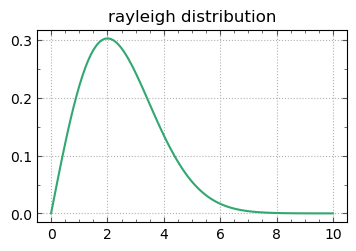

In [6]:
lowerLimit = 0 #lower limit of the sampling
upperLimit = 10 #upperlimit of the sampling
seed = 3 #seed of the sampling, arbitrarly chosen
steps = 1000000 #steps of the random walk

def a(p1, p2):#, q1, q2):
    return p2/p1 #(p2*q1)/(p1*q2)

def ray(x, sigma):
    return (x/sigma**2) * np.exp(-((x)**2)/(2*(sigma**2)))

sigmaTarget = 2 #sigma of the target distribution
x0 = np.linspace(lowerLimit, upperLimit, 100)
target = ray(x0, sigmaTarget)

epsilon = .1
step = np.zeros(steps)
xCurr = np.zeros(steps)
xCurr[0] = seed
xNext = np.zeros(steps)
pCurr = np.zeros(steps)
pNext = np.zeros(steps)
qCurr = np.zeros(steps)
qNext = np.zeros(steps)
a0 = np.zeros(steps)
u = np.zeros(steps)

fig = plt.figure(figsize=(4,2.5))
plt.plot(x0, target, color='#31A772')
ax = plt.gca()
ax.tick_params(direction='in', top=True, right=True, color='#555555')  # Tick maggiori
ax.tick_params(axis='both', direction='in', which='minor', top=True, right=True, color='#555555')  # Tick minori
ax.xaxis.set_minor_locator(AutoMinorLocator(4))  
ax.yaxis.set_minor_locator(AutoMinorLocator(2))  
plt.grid(linestyle='dotted')
plt.title('rayleigh distribution')
plt.show()

### metropolis

In [13]:
stepLength = .1
for i in range(steps-1):
    step[i] = np.random.choice([-1, 1]) 
    xNext[i] = xCurr[i] + (step[i]*stepLength)
    pCurr[i] = ray(xCurr[i], sigmaTarget)
    pNext[i] = ray(xNext[i], sigmaTarget)
    a0[i] = a(pCurr[i], pNext[i])
    u[i] = np.random.uniform(0, 1)
    if xNext[i] == lowerLimit or xNext[i] == upperLimit:
        xCurr[i+1] = xCurr[i]
    elif a0[i] < u[i]:
        xCurr[i+1] = xCurr[i]
    else:
        xCurr[i+1] = xNext[i]

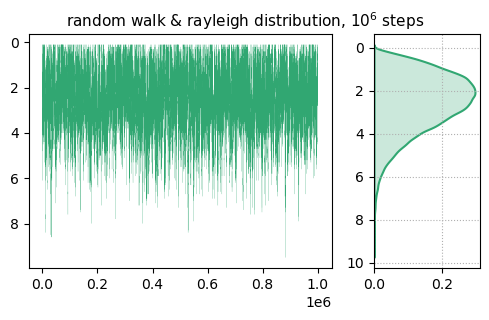

In [14]:
stepsArray = np.arange(0, steps) #array of the sampling steps

fig = plt.figure(figsize=(5, 3), facecolor=(1,1,1))
grid = plt.GridSpec(1, 2, width_ratios=[1, .35])
ax1 = fig.add_subplot(grid[0, 0])  
ax1.plot(stepsArray, xCurr, linewidth=.1, color='#31A772')
plt.gca().invert_yaxis()
ax2 = fig.add_subplot(grid[0, 1])  
sns.kdeplot(y=xCurr, linewidth=1.5, color='#31A772', fill=True)
ax2.set_xlabel('')
plt.gca().invert_yaxis()
ax2.grid(linestyle='dotted')

plt.tight_layout()
fig.suptitle(r"random walk & rayleigh distribution, $10^6$ steps", fontsize=11, y=1.05)
fig.subplots_adjust(top=.97)
plt.show()